# First Prototype

**Author: Xiaochi (George) Li**


In [3]:
import tensorflow as tf
tf.__version__

'1.10.0'

In [4]:
import numpy as np

In [28]:
label2expression = {1: "Surprise",2: "Fear",3: "Disgust",4: "Happiness",
                    5: "Sadness", 6: "Anger",7: "Neutral"}

In [24]:
# create image label pair as a dictionary
label_file = "../RAFDB/list_patition_label.txt"
img_label_pair = {}
with open(label_file) as all_label:
    for label in all_label:
        label = label.rstrip()
        img_label_pair[label.split(" ")[0][:-4]+"_aligned.jpg"] = int(label.split(" ")[1])


In [25]:
img_label_pair

{'train_00001_aligned.jpg': 5,
 'train_00002_aligned.jpg': 5,
 'train_00003_aligned.jpg': 4,
 'train_00004_aligned.jpg': 4,
 'train_00005_aligned.jpg': 5,
 'train_00006_aligned.jpg': 1,
 'train_00007_aligned.jpg': 5,
 'train_00008_aligned.jpg': 4,
 'train_00009_aligned.jpg': 4,
 'train_00010_aligned.jpg': 1,
 'train_00011_aligned.jpg': 4,
 'train_00012_aligned.jpg': 1,
 'train_00013_aligned.jpg': 1,
 'train_00014_aligned.jpg': 4,
 'train_00015_aligned.jpg': 5,
 'train_00016_aligned.jpg': 4,
 'train_00017_aligned.jpg': 4,
 'train_00018_aligned.jpg': 4,
 'train_00019_aligned.jpg': 4,
 'train_00020_aligned.jpg': 4,
 'train_00021_aligned.jpg': 4,
 'train_00022_aligned.jpg': 4,
 'train_00023_aligned.jpg': 6,
 'train_00024_aligned.jpg': 5,
 'train_00025_aligned.jpg': 5,
 'train_00026_aligned.jpg': 5,
 'train_00027_aligned.jpg': 2,
 'train_00028_aligned.jpg': 5,
 'train_00029_aligned.jpg': 4,
 'train_00030_aligned.jpg': 5,
 'train_00031_aligned.jpg': 3,
 'train_00032_aligned.jpg': 1,
 'train_

Surprise
(100, 100, 3)


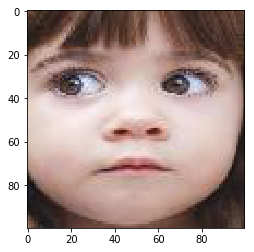

In [31]:
# 
# https://stackoverflow.com/questions/50753668/how-do-i-set-up-a-image-dataset-in-tensorflow-for-a-cnn
import numpy as np
from PIL import Image
import os.path

folder = "../RAFDB/aligned/"
image_name = "test_0002_aligned.jpg"
full_name = folder + image_name
print(label2expression[img_label_pair[image_name]])
img = Image.open(full_name).convert('RGB')
img = np.array(img)
print(img.shape)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [36]:
import numpy as np
from PIL import Image
length = 100
width = 100
imgs = np.empty((0, length, width, 3))
imgs.shape

(0, 100, 100, 3)

In [ ]:
for image_name in img_label_pair:
    
    img = Image.open(folder + image_name).convert('RGB')
    img = np.array(img).reshape((1,100,100,3))
    imgs = np.append(imgs, img, axis=0)

In [ ]:
imgs.shape